In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Riyaz\Desktop\KNN Problem_ Data Set.csv')

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [5]:
df.duplicated().value_counts()

False    1000
dtype: int64

In [6]:
df.corr()['TARGET CLASS'].sort_values()

GWYH           -0.416168
JHZC           -0.301725
GUUB           -0.174496
TLLZ           -0.172029
MGJM           -0.098887
XVPM           -0.079896
HYKR           -0.015266
EDFS            0.281607
IGGA            0.295390
TRAT            0.489347
TARGET CLASS    1.000000
Name: TARGET CLASS, dtype: float64

<AxesSubplot:>

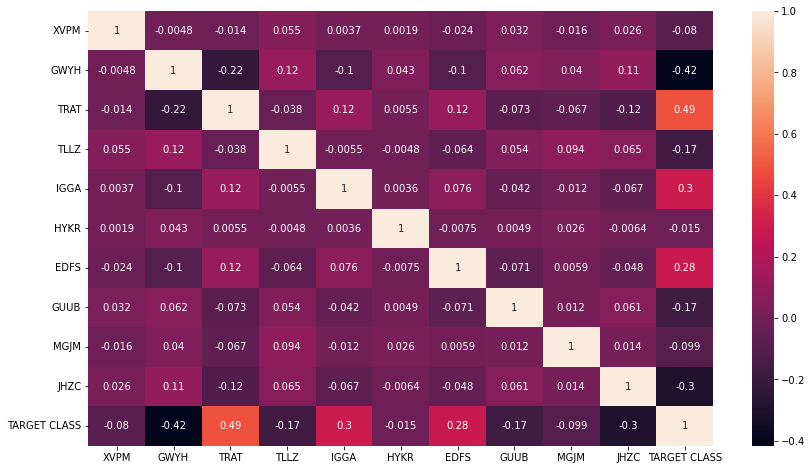

In [7]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True)

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
XVPM,1000.0,1055.071157,370.980193,21.17,767.413366,1045.904805,1326.065178,2117.0
GWYH,1000.0,991.851567,392.278890,21.72,694.859326,978.355081,1275.528770,2172.0
TRAT,1000.0,1529.373525,640.286092,31.80,1062.600806,1522.507269,1991.128626,3180.0
TLLZ,1000.0,495.107156,142.789188,8.45,401.788135,500.197421,600.525709,845.0
IGGA,1000.0,940.590072,345.923136,17.93,700.763295,939.348662,1182.578166,1793.0
HYKR,1000.0,1550.637455,493.491988,27.93,1219.267077,1564.996551,1891.937040,2793.0
EDFS,1000.0,1561.003252,598.608517,31.96,1132.097865,1565.882879,1981.739411,3196.0
GUUB,1000.0,561.346117,247.357552,13.52,381.704293,540.420379,725.762027,1352.0
MGJM,1000.0,1089.067338,402.666953,23.21,801.849802,1099.087954,1369.923665,2321.0
JHZC,1000.0,1452.521629,568.132005,30.89,1059.499689,1441.554053,1864.405512,3089.0


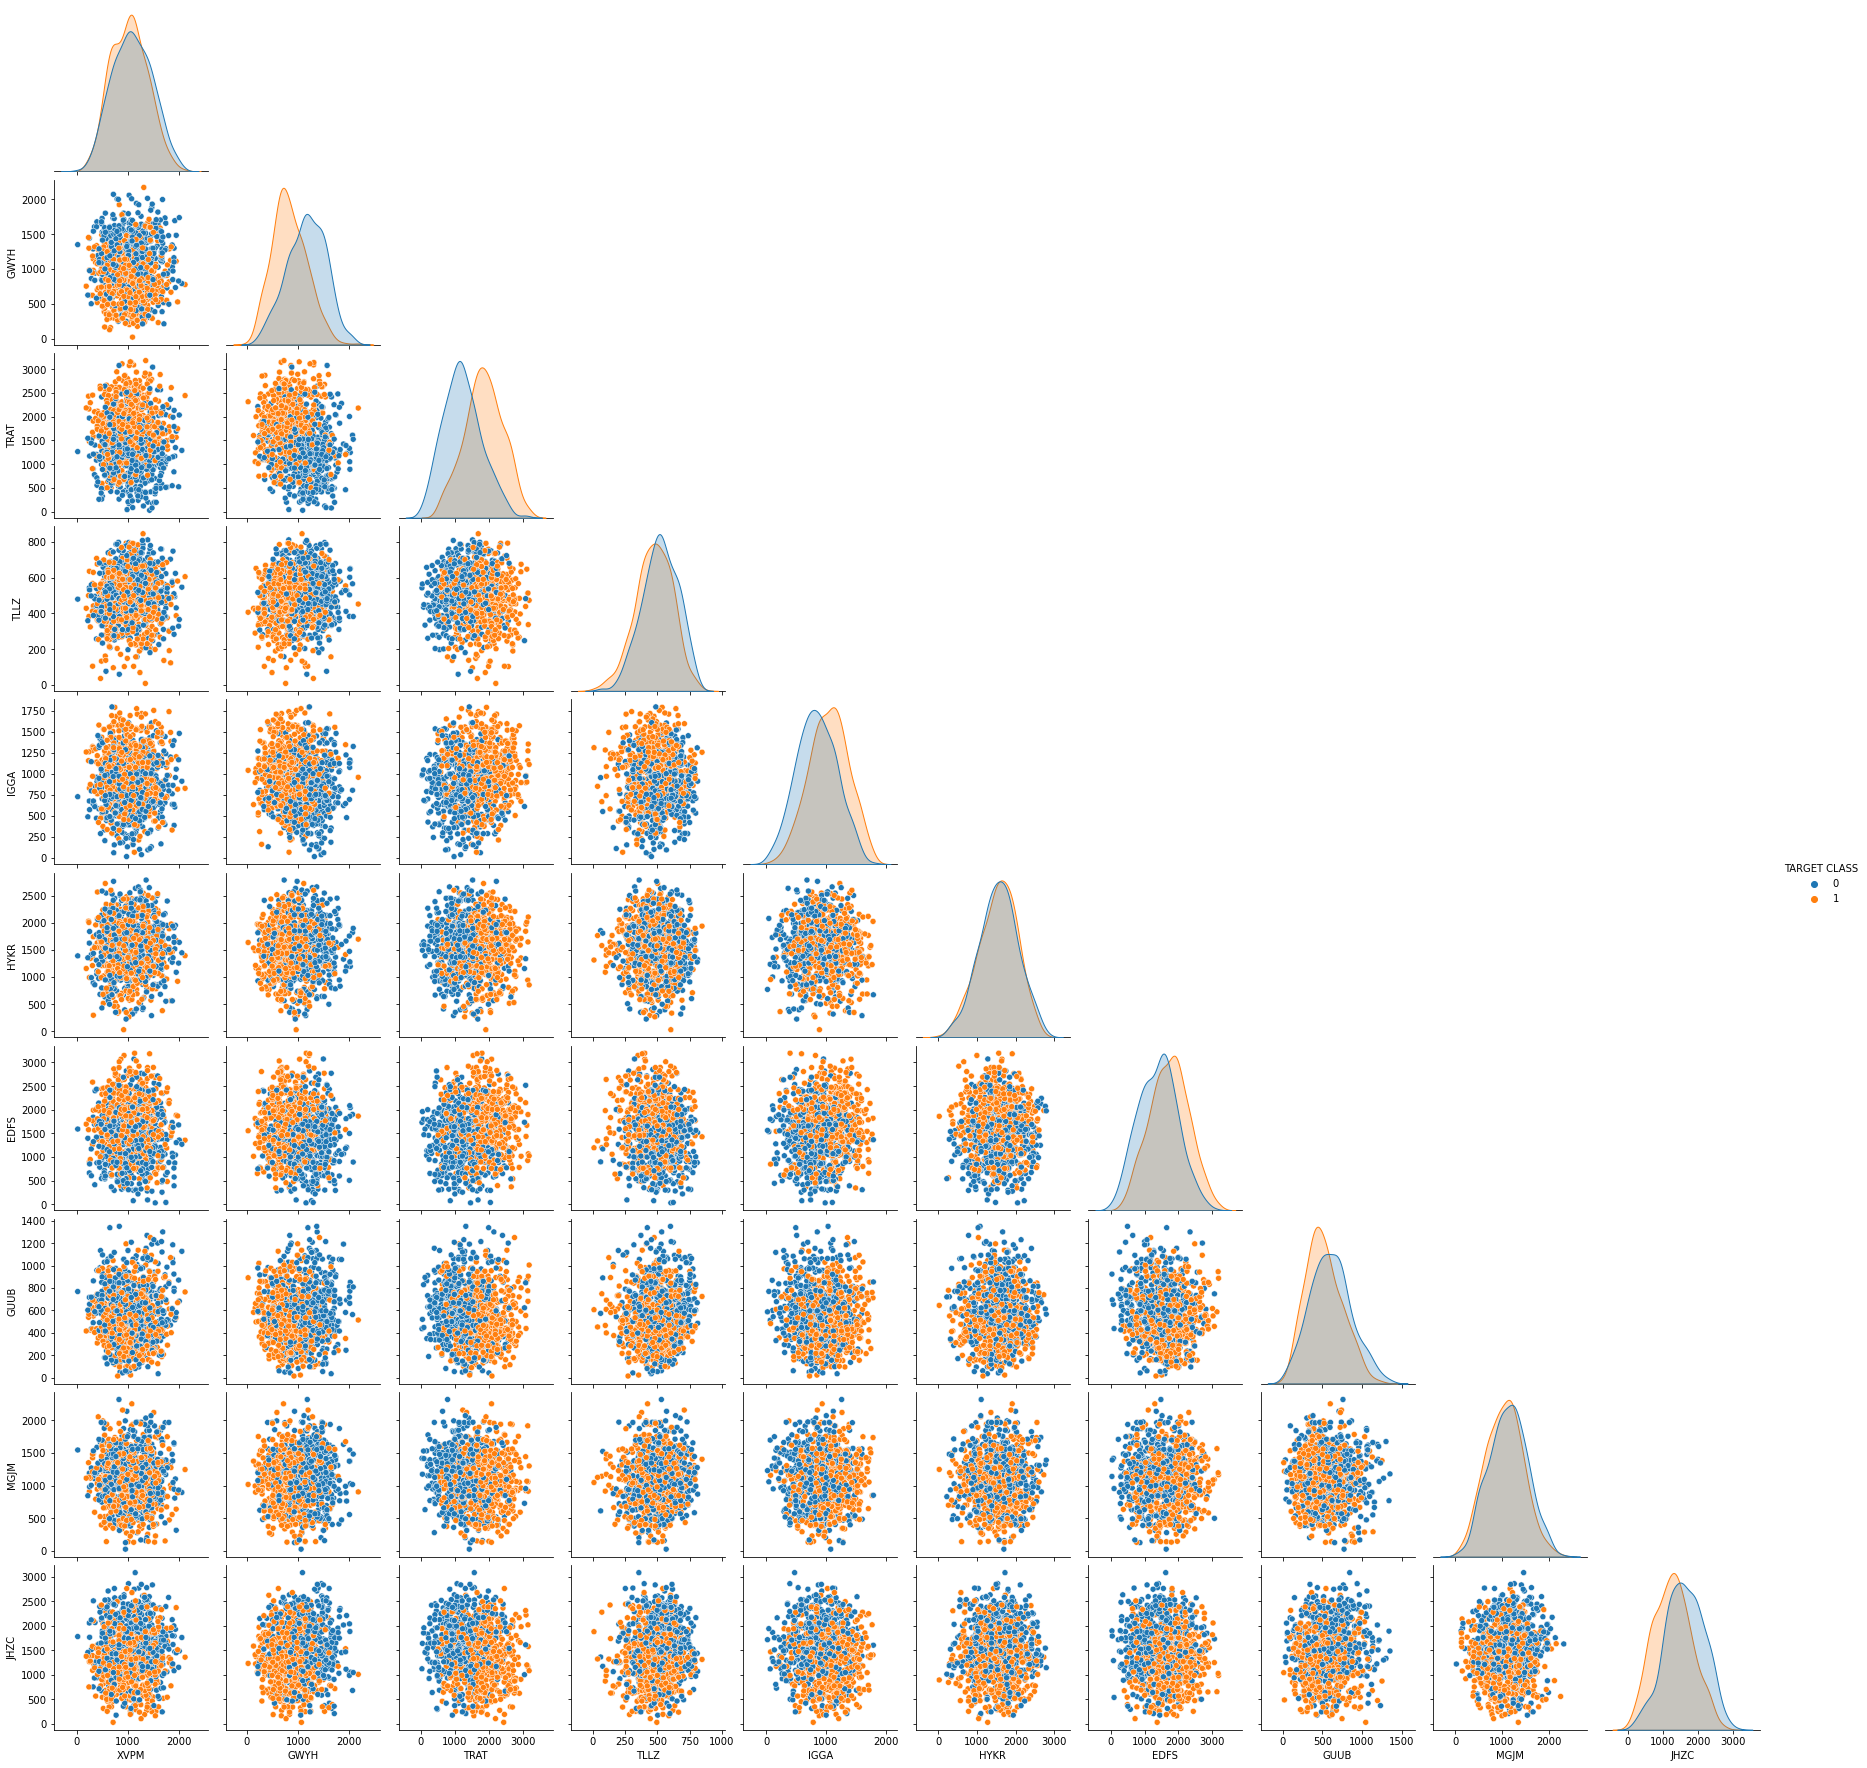

In [9]:
sns.pairplot(df, hue='TARGET CLASS', corner=True)

In [10]:
df['TARGET CLASS'].value_counts()

0    500
1    500
Name: TARGET CLASS, dtype: int64

In [11]:
X = df.drop('TARGET CLASS', axis=1)
y = df['TARGET CLASS']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier()
scalar = StandardScaler()

operations = [('scalar',scalar),('knn',knn)]

pipe = Pipeline(operations)

In [14]:
from sklearn.model_selection import GridSearchCV

k_val = np.arange(1,30)

param_grid = {'knn__n_neighbors': k_val}

gd_model = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=5)

In [15]:
gd_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='accuracy')

In [16]:
gd_model.best_params_

{'knn__n_neighbors': 14}

In [17]:
gd_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scalar', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scalar': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scalar__copy': True,
 'scalar__with_mean': True,
 'scalar__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [18]:
gd_dict = gd_model.cv_results_
# gd_dict
accur = gd_dict['mean_test_score']
accur

array([0.73222222, 0.73666667, 0.77666667, 0.79222222, 0.81555556,
       0.81111111, 0.81111111, 0.81111111, 0.81555556, 0.80555556,
       0.81888889, 0.81888889, 0.82      , 0.83222222, 0.82555556,
       0.82666667, 0.82333333, 0.82777778, 0.82222222, 0.82222222,
       0.81777778, 0.82      , 0.82444444, 0.81888889, 0.82      ,
       0.81888889, 0.82111111, 0.82333333, 0.82      ])

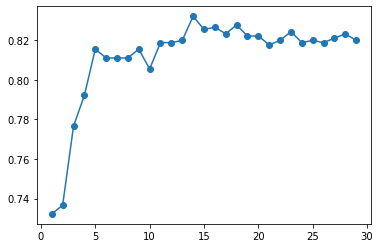

In [19]:
plt.plot(k_val,accur, marker='o',markersize=6) # 'o-', 'go-', go--
plt.show()

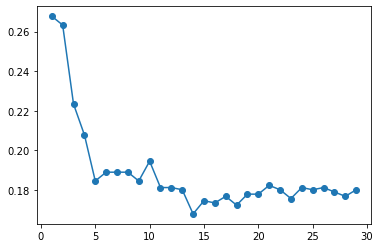

In [20]:
plt.plot(k_val,1-accur, marker='o',markersize=6) # 'o-', 'go-', go--
plt.show()

In [21]:
scaler = StandardScaler()
knn_5 = KNeighborsClassifier(n_neighbors=5)
operations = [('scaler',scaler),('knn_5',knn_5)]

In [22]:
pipe = Pipeline(operations)

In [23]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_5', KNeighborsClassifier())])

In [24]:
pipe_pred = pipe.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(classification_report(y_test, pipe_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80        50
           1       0.79      0.84      0.82        50

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



In [27]:
confusion_matrix(y_test, pipe_pred)

array([[39, 11],
       [ 8, 42]], dtype=int64)

In [36]:
single_sample = X_test.iloc[[2]]

In [41]:
single_sample_res = y_test.iloc[[2]]

In [37]:
single_sample

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
740,1072.040789,613.885665,1488.508562,458.592804,949.118757,1643.246391,1986.860799,88.069783,753.018938,1771.570132


In [42]:
single_sample_res

740    1
Name: TARGET CLASS, dtype: int64

In [38]:
pipe.predict(single_sample) # X_test.iloc[5], (single_sample.values.reshape(1, -1))

array([1], dtype=int64)

In [39]:
pipe.predict_proba(single_sample)

array([[0.2, 0.8]])